In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression,f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [3]:
raw_data =pd.read_csv('https://raw.githubusercontent.com/dataafriquehub/energy_data/refs/heads/main/train.csv')
raw_data.head()

country      lat      lon  population  taux_ensoleillement  \
0             Zimbabwe -19.0154  29.1549    14862924             5.004870   
1  Congo (Brazzaville)  -0.2280  15.8277     5518092             4.609972   
2              Namibia -22.9576  18.4904     2540905             5.792826   
3              Somalia   5.1521  46.1996    15893222             4.104030   
4     Congo (Kinshasa)  -4.0383  21.7587    89561403             6.103335   

   demande_energetique_actuelle  demande_energetique_projectee  \
0                    485.085906                     544.232257   
1                   1422.802172                    1864.048290   
2                   4711.082367                    5525.433108   
3                    799.426659                    1447.543617   
4                   2526.920477                    3029.604497   

   capacite_installee_actuelle  duree_ensoleillement_annuel  \
0                   583.128945                  3936.978948   
1                   163.908475                  3753.749894   
2                  1404.435659                  3804.854034   
3                  1370.179083                  2047.305693   
4                   962.398626                  3421.335117   

   cout_installation_solaire  ...  taux_adoption_energies_renouvelables  \
0                 926.985577  ...                             14.282752   
1                 862.739803  ...                             41.408913   
2                1298.932535  ...                             41.259170   
3                1256.611785  ...                             21.930857   
4                1484.398731  ...                             37.127657   

   stabilite_politique  taux_acces_energie  niveau_urbanisation  \
0             2.575677           67.501053            35.733884   
1             2.747196           61.851008            40.134654   
2             3.091990           17.384882            46.964564   
3             3.639728           21.744383            40.211287   
4             6.572047           47.679339            63.201230   

   potentiel_investissement  types_sols emissions_co2_evitees       idh  \
0                         4     rocheux            555.209808  0.441787   
1                         2  sablonneux           3722.310275  0.380139   
2                         5    argileux           9824.421047  0.678362   
3                         1     rocheux           9407.183123  0.731126   
4                         3    argileux           9184.154421  0.357112   

   habit_de_mariage nombre_animaux_domestiques  
0      traditionnel                          2  
1      traditionnel                          5  
2           moderne                          0  
3           moderne                          7  
4           moderne                          2  

[5 rows x 21 columns]


### **Description des colonnes**

| Colonne                              | Description                                                                                                    |
|--------------------------------------|----------------------------------------------------------------------------------------------------------------|
| `country`                            | Le pays où se situe la région.                                                                                 |
| `lat`, `lon`                         | Latitude et longitude de la région, permettant d'analyser les conditions géographiques.                        |
| `population`                         | Population de la région, un indicateur de la demande énergétique potentielle.                                  |
| `taux_ensoleillement`                | Moyenne du taux d'ensoleillement annuel, indiquant le potentiel solaire de la région.                          |
| `demande_energetique_actuelle`       | La demande énergétique actuelle de la région.                                                                  |
| `demande_energetique_projectee`      | **Variable cible** – La demande énergétique projetée pour la région (à prédire dans le fichier de soumission). |
| `capacite_installee_actuelle`        | La capacité énergétique actuelle installée dans la région.                                                     |
| `duree_ensoleillement_annuel`        | Nombre moyen d'heures d'ensoleillement annuel, influençant le potentiel de production solaire.                 |
| `cout_installation_solaire`          | Coût moyen pour installer des infrastructures solaires dans la région.                                        |
| `proximite_infrastructures_energetiques` | Distance aux infrastructures énergétiques existantes, influençant l'accès à l'énergie.                    |
| `taux_adoption_energies_renouvelables` | Pourcentage de la population utilisant des énergies renouvelables.                                         |
| `stabilite_politique`                | Score de stabilité politique, un facteur pouvant affecter les investissements énergétiques.                    |
| `taux_acces_energie`                 | Pourcentage de la population ayant actuellement accès à l'énergie.                                            |
| `niveau_urbanisation`                | Niveau d'urbanisation de la région, lié à l'infrastructure et à la demande en énergie.                        |
| `potentiel_investissement`           | Indicateur de l'intérêt potentiel pour des investissements énergétiques dans la région.                        |
| `types_sols`                         | Type de sol dans la région, pouvant affecter la faisabilité des infrastructures solaires.                      |
| `emissions_co2_evitees`              | Estimation des émissions de CO₂ évitées grâce aux énergies renouvelables installées.                          |
| `idh`                                | Indice de développement humain, un facteur socio-économique influençant la demande énergétique.                |
| `habit_de_mariage`                   | Tradition vestimentaire locale lors des mariages, incluse pour ajouter de la variété dans les données.         |
| `nombre_animaux_domestiques`         | Nombre moyen d'animaux domestiques par foyer, inclus pour ajouter de la variété dans les données.              |

---

### **Tâches pour les participants**

1. **Analyse Exploratoire des Données (EDA)** :
   - Analyser les relations entre les caractéristiques et identifier celles qui influencent le plus `demande_energetique_projectee`.
   - Examiner les distributions, les valeurs manquantes, et les éventuels prétraitements nécessaires.

2. **Développement et ajustement du modèle** :
   - Utiliser les données d’entraînement (`train.csv`) pour construire un modèle de prédiction de la demande énergétique.
   - Ajuster le modèle en utilisant les données de test (`test.csv`), qui inclut la cible `demande_energetique_projectee`, pour maximiser la précision du modèle.
   - **Note** : Bien que le fichier de test contienne la cible, les participants doivent éviter le surajustement en utilisant des méthodes de validation appropriées (cross-validation, etc.).

3. **Prédictions sur le fichier de soumission** :
   - Appliquer le modèle optimisé au fichier `submission.csv` pour prédire la `demande_energetique_projectee`.
   - Générer un fichier de soumission avec les identifiants et les prédictions, conformément au format spécifié ci-dessous.

## Analyse de forme

In [4]:
df= raw_data.copy()

In [5]:
df.shape

(150000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   country                                 150000 non-null  object 
 1   lat                                     150000 non-null  float64
 2   lon                                     150000 non-null  float64
 3   population                              150000 non-null  int64  
 4   taux_ensoleillement                     150000 non-null  float64
 5   demande_energetique_actuelle            150000 non-null  float64
 6   demande_energetique_projectee           150000 non-null  float64
 7   capacite_installee_actuelle             150000 non-null  float64
 8   duree_ensoleillement_annuel             150000 non-null  float64
 9   cout_installation_solaire               150000 non-null  float64
 10  proximite_infrastructures_energetiques  1500

In [10]:
# Analyse des valeurs manquantes
df.isnull().sum()

country                                       0
lat                                           0
lon                                           0
population                                    0
taux_ensoleillement                           0
demande_energetique_actuelle                  0
demande_energetique_projectee                 0
capacite_installee_actuelle                   0
duree_ensoleillement_annuel                   0
cout_installation_solaire                     0
proximite_infrastructures_energetiques        0
taux_adoption_energies_renouvelables      15136
stabilite_politique                           0
taux_acces_energie                            0
niveau_urbanisation                           0
potentiel_investissement                      0
types_sols                                    0
emissions_co2_evitees                         0
idh                                           0
habit_de_mariage                              0
nombre_animaux_domestiques                    0
dtype: int64

<Axes: >

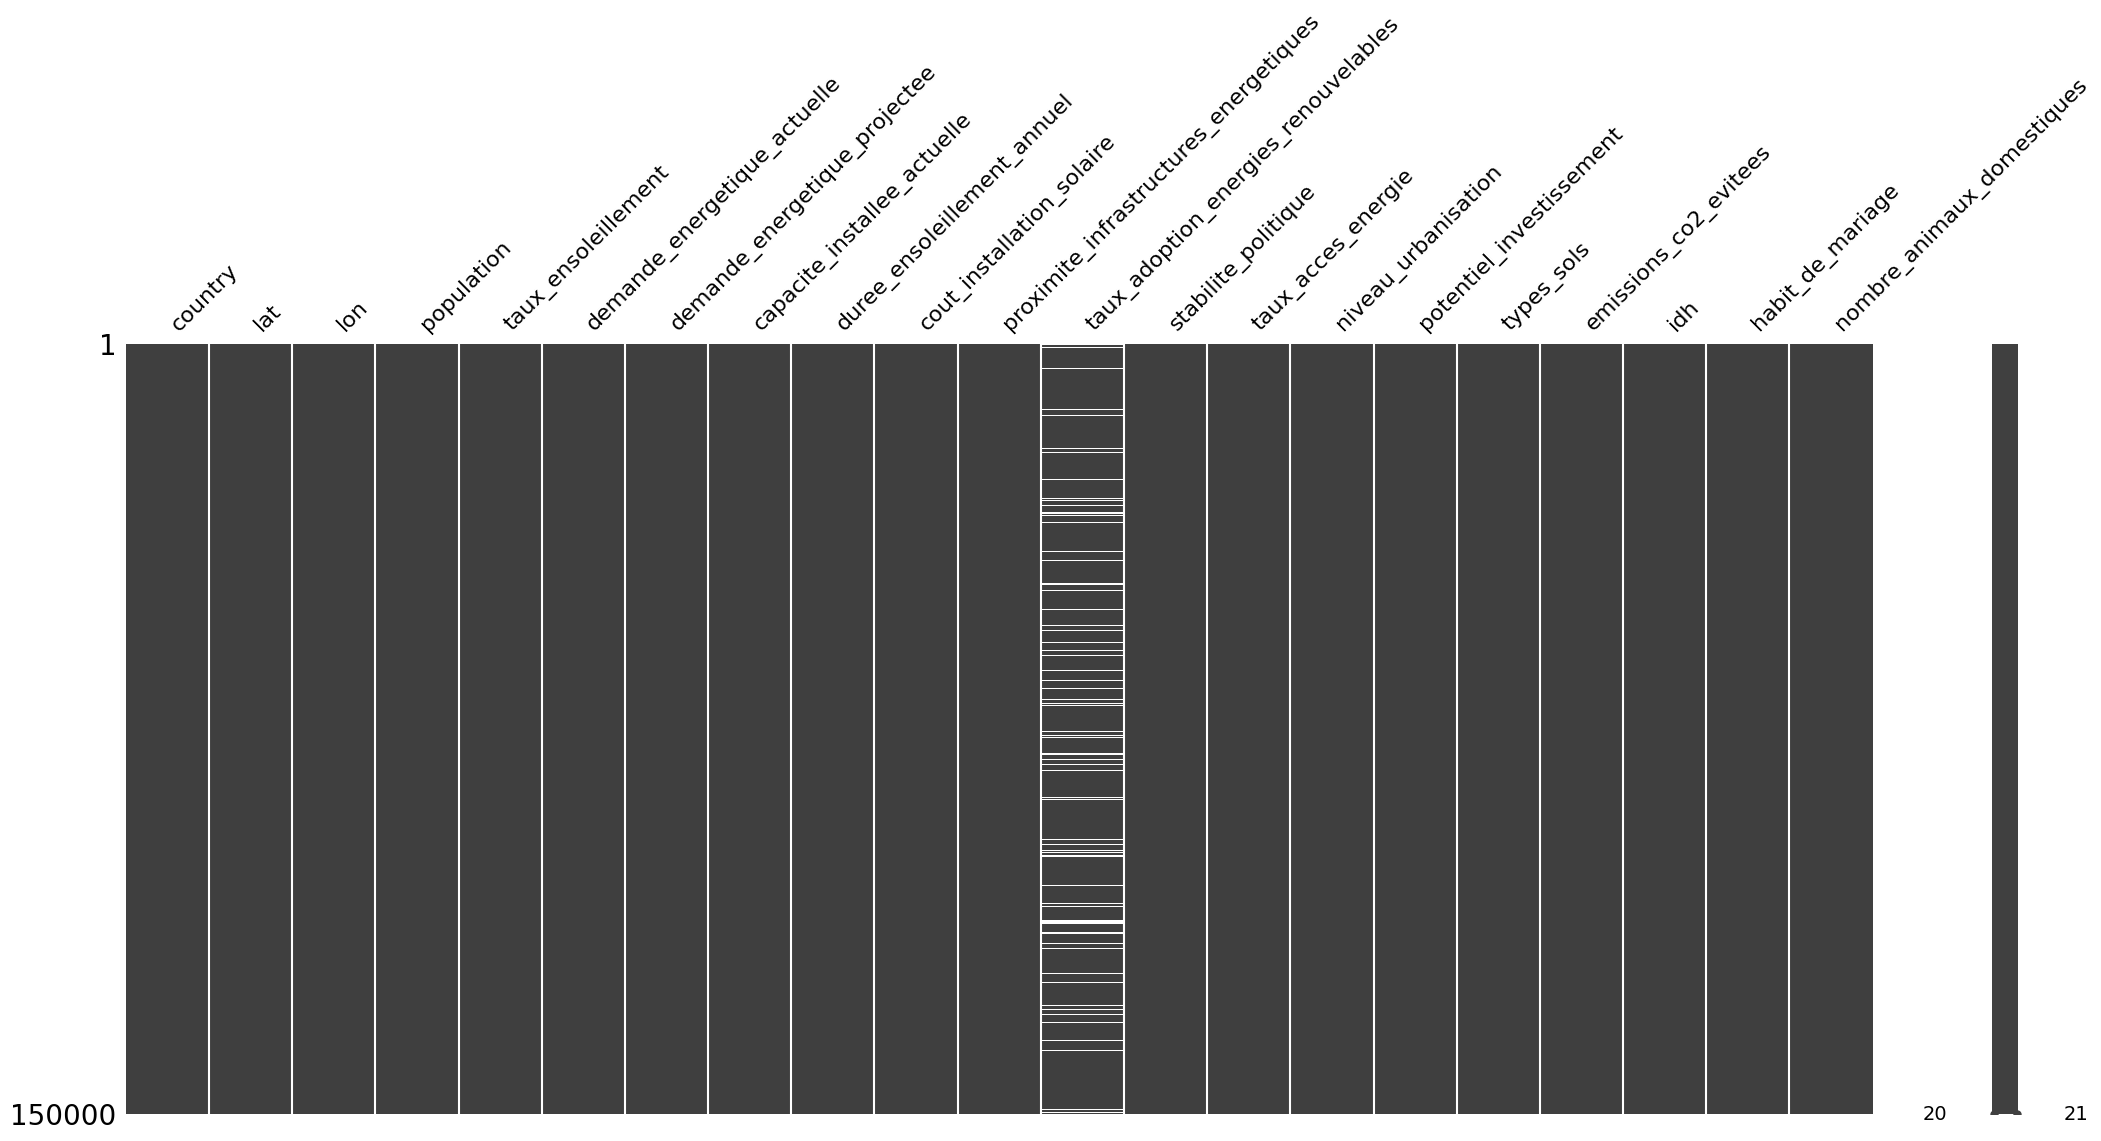

In [19]:
msno.matrix(raw_data)

In [27]:
# Ecrire un regex pour verifier si une colonne de type float ne contient pas des chaines de caracteres
pattern = r'^-?[0-9]+\.?[0-9]*$'
df['population']= df['population'].astype('str')
df[df['population'].str.match(pattern)==False]


Empty DataFrame
Columns: [country, lat, lon, population, taux_ensoleillement, demande_energetique_actuelle, demande_energetique_projectee, capacite_installee_actuelle, duree_ensoleillement_annuel, cout_installation_solaire, proximite_infrastructures_energetiques, taux_adoption_energies_renouvelables, stabilite_politique, taux_acces_energie, niveau_urbanisation, potentiel_investissement, types_sols, emissions_co2_evitees, idh, habit_de_mariage, nombre_animaux_domestiques]
Index: []

[0 rows x 21 columns]

In [29]:
def check_float_columns_for_strings(df, pattern = r'^-?[0-9]+\.?[0-9]*$'):
  """
  Checks if float columns in a DataFrame contain strings using a regex pattern.

  Args:
    df: The Pandas DataFrame.
    pattern: The regex pattern to match float values. Defaults to r'^[0-9]+\.?[0-9]*$'.

  Returns:
    A dictionary where keys are column names and values are DataFrames containing
    rows with non-numeric values in the respective columns.
  """

for column in df.select_dtypes(include=['number']):  # Iterate through numeric columns
    non_numeric_count = (~df[column].astype(str).str.match(pattern)).sum()
    if non_numeric_count > 0:
      print(f"Column '{column}' contains {non_numeric_count} row(s) with non-numeric values.")

Column 'taux_adoption_energies_renouvelables' contains 15136 row(s) with non-numeric values.


On a la colonne:
- ¨taux_adoption_energies_renouvelable¨====> 15136 lignes avec des chaines de caracteres

### Inspection de la colonne ¨taux_adoption_energies_renouvelables¨

In [35]:
# Inspection des chaines de caracteres dans lat
df['taux_adoption_energies_renouvelables']= df['taux_adoption_energies_renouvelables'].astype('str')
df[df['taux_adoption_energies_renouvelables'].str.match(pattern)==False]


country       lat      lon population  \
15      Eswatini (Swaziland)  -26.5225  31.4659    1160164   
21          Congo (Kinshasa)   -4.0383  21.7587   89561403   
36                    Malawi  -13.2543  34.3015   19129952   
71              South Africa  -30.5595  22.9375   59308690   
72                     Libya   26.3351  17.2283    6871292   
...                      ...       ...      ...        ...   
149959              Botswana  -22.3285  24.6849    2351627   
149976               Tunisia   33.8869   9.5375   11818618   
149977                  Chad   15.4542  18.7322   16425864   
149983               Comoros  -11.6455  43.3333     869601   
149991                  Chad   15.4542  18.7322   16425864   

        taux_ensoleillement  demande_energetique_actuelle  \
15                 5.254160                   3590.932926   
21                 4.988162                   3139.072039   
36                 6.590241                   2175.551904   
71                 4.956696                   2367.234489   
72                 5.440233                   2584.619963   
...                     ...                           ...   
149959             4.059773                   4786.025363   
149976             4.049694                   4493.613447   
149977             6.950756                    708.162415   
149983             6.490228                   4087.890663   
149991             5.390992                   3433.757520   

        demande_energetique_projectee  capacite_installee_actuelle  \
15                        4030.221909                   891.539871   
21                        3376.128895                  1062.512460   
36                        3596.232099                  1766.394542   
71                        3394.984610                   364.762150   
72                        4986.683853                  1989.261544   
...                               ...                          ...   
149959                    8984.742407                   254.023574   
149976                    5361.626220                   989.616904   
149977                    1238.410182                  1798.354761   
149983                    6696.298622                  1994.533850   
149991                    4414.939599                  1774.871469   

        duree_ensoleillement_annuel  cout_installation_solaire  ...  \
15                      2920.614949                 876.709325  ...   
21                      2583.236109                1163.482029  ...   
36                      2474.979432                1162.152617  ...   
71                      2172.184004                 911.174047  ...   
72                      3047.331587                 881.678682  ...   
...                             ...                        ...  ...   
149959                  3834.445229                1160.541252  ...   
149976                  3686.907811                1041.006800  ...   
149977                  3447.440880                1121.968724  ...   
149983                  2960.781737                1255.274345  ...   
149991                  3293.752166                1416.489174  ...   

        taux_adoption_energies_renouvelables stabilite_politique  \
15                                       nan            3.842325   
21                                       nan            4.248834   
36                                       nan            7.500063   
71                                       nan            7.163443   
72                                       nan            1.205072   
...                                      ...                 ...   
149959                                   nan            9.416068   
149976                                   nan            4.304606   
149977                                   nan            7.533603   
149983                                   nan            3.198070   
149991                                   nan            9.170535   

        taux_acces_energie  nive

Il s'agit des valeurs NaN avec un taux de 15136/150000 = 10.090666666666667

## Analyse de fond

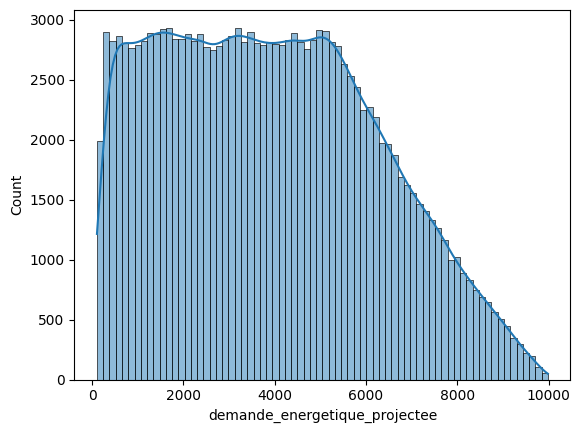

In [38]:
#Visualisation de la targuet variable
sns.histplot(df['demande_energetique_projectee'], kde=True)
plt.show()

In [42]:
df['demande_energetique_projectee'].mean(), df['demande_energetique_projectee'].median(), df['demande_energetique_projectee'].std()

(3896.053757925214, 3767.976294188099, 2304.560838056593)

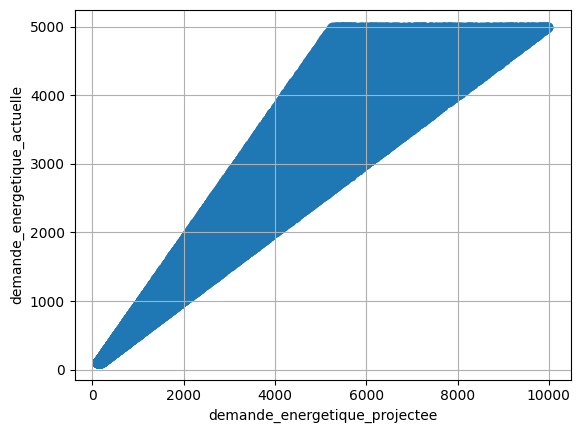

In [48]:
#visualisation demand_energetique_projectee et demande_energetique_actuelle
plt.scatter(df['demande_energetique_projectee'], df['demande_energetique_actuelle'])
plt.xlabel('demande_energetique_projectee')
plt.ylabel('demande_energetique_actuelle')
plt.grid(True)
plt.show()

Il semble y avoir une realtion lineaire entre les deux variables. demande_energetique_projectee et demande_energetique_actuelle.
* Cela reste une hypo verifier

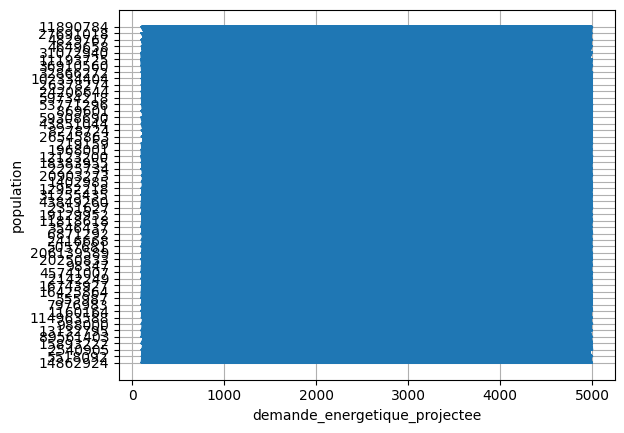

In [53]:
#Visualisation entre demande_energetiqueç=_projectee et la population
plt.plot(df['demande_energetique_actuelle'], df['population'])
plt.xlabel('demande_energetique_projectee')
plt.ylabel('population')
plt.grid(True)
plt.show()

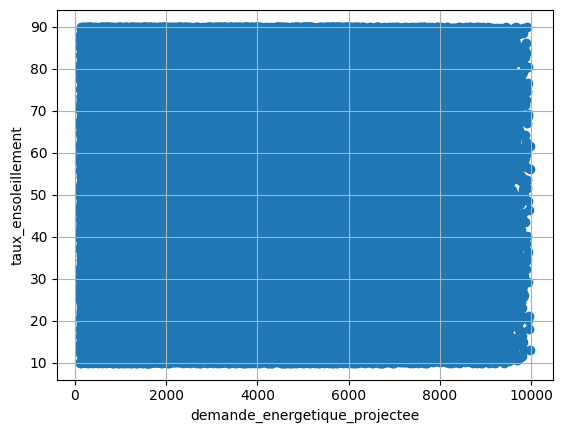

In [58]:
# Visualisation de la demande_energetique_projectee et taux_ensoleillement
plt.scatter(df['demande_energetique_projectee'], df['taux_acces_energie'])
plt.xlabel('demande_energetique_projectee')
plt.ylabel('taux_ensoleillement')
plt.grid(True)
plt.show()

In [60]:
df_num= df.select_dtypes(include=['number'])


In [62]:
# Visualisation entre variables/ variables
# sns.pairplot(df_num)
# plt.show()

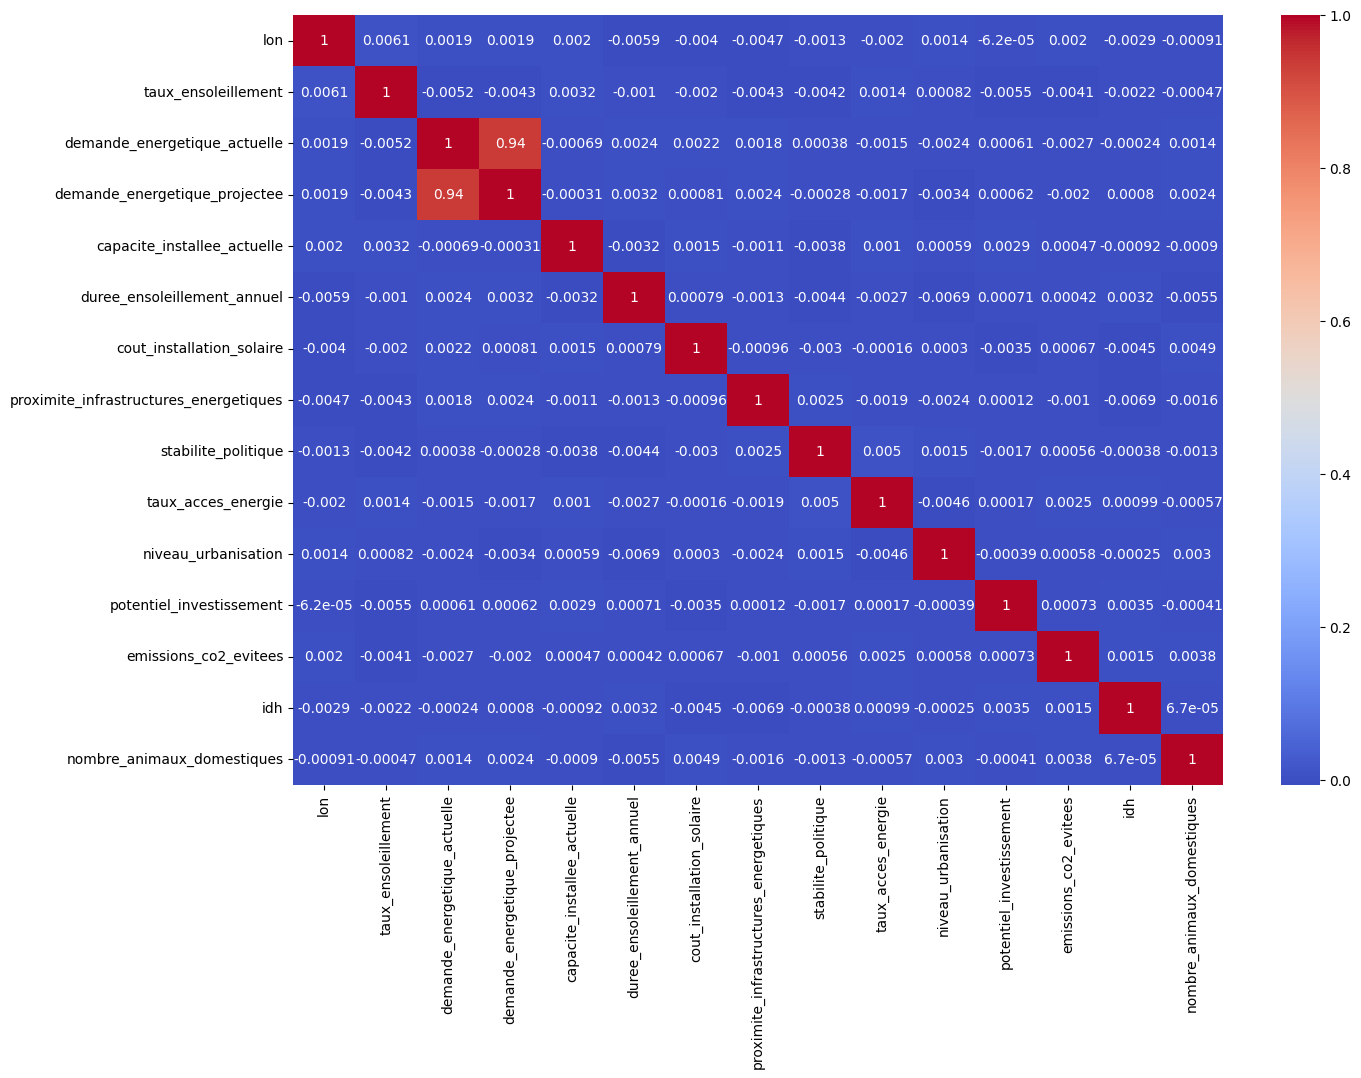

In [46]:
# Visualisation de la targuet variable et les autres variables
plt.figure(figsize=(15, 10))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

* Hypothese d'une relation lineaire entre la _demande_energetique_actuelle_ et la _demande_energetique_projectee_ est bien vrai avec un coef de linearité de 0.94

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   country                                 150000 non-null  object 
 1   lat                                     150000 non-null  object 
 2   lon                                     150000 non-null  float64
 3   population                              150000 non-null  object 
 4   taux_ensoleillement                     150000 non-null  float64
 5   demande_energetique_actuelle            150000 non-null  float64
 6   demande_energetique_projectee           150000 non-null  float64
 7   capacite_installee_actuelle             150000 non-null  float64
 8   duree_ensoleillement_annuel             150000 non-null  float64
 9   cout_installation_solaire               150000 non-null  float64
 10  proximite_infrastructures_energetiques  1500

In [67]:
df.columns



Index(['country', 'lat', 'lon', 'population', 'taux_ensoleillement',
       'demande_energetique_actuelle', 'demande_energetique_projectee',
       'capacite_installee_actuelle', 'duree_ensoleillement_annuel',
       'cout_installation_solaire', 'proximite_infrastructures_energetiques',
       'taux_adoption_energies_renouvelables', 'stabilite_politique',
       'taux_acces_energie', 'niveau_urbanisation', 'potentiel_investissement',
       'types_sols', 'emissions_co2_evitees', 'idh', 'habit_de_mariage',
       'nombre_animaux_domestiques'],
      dtype='object')

In [70]:
cols= ['population', 'taux_ensoleillement',
       'demande_energetique_actuelle', 'demande_energetique_projectee',
       'capacite_installee_actuelle', 'duree_ensoleillement_annuel',
       'cout_installation_solaire', 'proximite_infrastructures_energetiques',
       'taux_adoption_energies_renouvelables']
df_voulues= df[cols]
df_voulues.describe()


taux_ensoleillement  demande_energetique_actuelle  \
count        150000.000000                 150000.000000   
mean              5.498319                   2554.848606   
std               0.865709                   1416.170655   
min               4.000055                    100.033990   
25%               4.747006                   1325.380969   
50%               5.499631                   2557.407637   
75%               6.248083                   3780.522576   
max               6.999989                   4999.969328   

       demande_energetique_projectee  capacite_installee_actuelle  \
count                  150000.000000                150000.000000   
mean                     3896.053758                  1024.344390   
std                      2304.560838                   562.096087   
min                       107.515374                    50.004456   
25%                      1949.653254                   537.791761   
50%                      3767.976294                  1024.182723   
75%                      5594.079254                  1511.082533   
max                      9981.053695                  1999.965613   

       duree_ensoleillement_annuel  cout_installation_solaire  \
count                150000.000000              150000.000000   
mean                   3001.292562                1149.543446   
std                     578.095387                 202.030306   
min                    2000.007113                 800.001077   
25%                    2498.979245                 974.693496   
50%                    3002.988483                1149.391548   
75%                    3501.538422                1324.360898   
max                    3999.982102                1499.997354   

       proximite_infrastructures_energetiques  
count                           150000.000000  
mean                                49.917513  
std                                 28.857227  
min                                  0.001092  
25%                                 24.876825  
50%                                 49.985940  
75%                                 74.786877  
max                                 99.998845

In [4]:
cleaned_df= raw_data.copy()

In [75]:
cleaned_df.describe()

lat            lon    population  taux_ensoleillement  \
count  150000.000000  150000.000000  1.500000e+05        150000.000000   
mean        3.204157      16.493778  2.522295e+07             5.498319   
std        15.495124      19.346708  3.574158e+07             0.865709   
min       -30.559500     -23.041800  9.834700e+04             4.000055   
25%        -4.679600       0.824800  3.546437e+06             4.747006   
50%         6.611100      18.490400  1.313280e+07             5.499631   
75%        12.862800      31.306900  3.107294e+07             6.248083   
max        33.886900      55.492000  2.061396e+08             6.999989   

       demande_energetique_actuelle  demande_energetique_projectee  \
count                 150000.000000                  150000.000000   
mean                    2554.848606                    3896.053758   
std                     1416.170655                    2304.560838   
min                      100.033990                     107.515374   
25%                     1325.380969                    1949.653254   
50%                     2557.407637                    3767.976294   
75%                     3780.522576                    5594.079254   
max                     4999.969328                    9981.053695   

       capacite_installee_actuelle  duree_ensoleillement_annuel  \
count                150000.000000                150000.000000   
mean                   1024.344390                  3001.292562   
std                     562.096087                   578.095387   
min                      50.004456                  2000.007113   
25%                     537.791761                  2498.979245   
50%                    1024.182723                  3002.988483   
75%                    1511.082533                  3501.538422   
max                    1999.965613                  3999.982102   

       cout_installation_solaire  proximite_infrastructures_energetiques  \
count              150000.000000                           150000.000000   
mean                 1149.543446                               49.917513   
std                   202.030306                               28.857227   
min                   800.001077                                0.001092   
25%                   974.693496                               24.876825   
50%                  1149.391548                               49.985940   
75%                  1324.360898                               74.786877   
max                  1499.997354                               99.998845   

       taux_adoption_energies_renouvelables  stabilite_politique  \
count                         134864.000000        150000.000000   
mean                              25.005484             5.504654   
std                               14.423153             2.595186   
min                                0.000256             1.000025   
25%                               12.556725             3.260647   
50%                               24.968379             5.502115   
75%                               37.480588             7.752408   
max                               49.999820             9.999986   

       taux_acces_energie  niveau_urbanisation  potentiel_investissement  \
count       150000.000000        150000.000000             150000.000000   
mean            50.002024            45.032828                  3.002847   
std             23.102159            14.421728                  1.413756   
min             10.000116            20.000187                  1.000000   
25%             30.032366            32.533373                  2.000000   
50%             49.988858            45.075952                  3.000000   
75%             69.979721            57.507313                  4.000000   
max             89.999885            69.999992                  5.000000   

       emissions_co2_evitees            idh  nombre_animaux_domestiques  
count          150000.000000  150000.000000               

In [5]:
# Traitement des valeurs NaN de la colonnes taux_adoption_energies_renouvelables
cleaned_df['taux_adoption_energies_renouvelables']= cleaned_df['taux_adoption_energies_renouvelables'].fillna(cleaned_df['taux_adoption_energies_renouvelables'].mean())


In [77]:
cleaned_df

country      lat      lon  population  \
0                       Zimbabwe -19.0154  29.1549    14862924   
1            Congo (Brazzaville)  -0.2280  15.8277     5518092   
2                        Namibia -22.9576  18.4904     2540905   
3                        Somalia   5.1521  46.1996    15893222   
4               Congo (Kinshasa)  -4.0383  21.7587    89561403   
...                          ...      ...      ...         ...   
149995  Central African Republic   6.6111  20.9394     4829767   
149996                    Angola -11.2027  17.8739    32866272   
149997                   Senegal  14.4974 -14.4524    16743927   
149998                   Somalia   5.1521  46.1996    15893222   
149999                    Rwanda  -1.9403  29.8739    12952218   

        taux_ensoleillement  demande_energetique_actuelle  \
0                  5.004870                    485.085906   
1                  4.609972                   1422.802172   
2                  5.792826                   4711.082367   
3                  4.104030                    799.426659   
4                  6.103335                   2526.920477   
...                     ...                           ...   
149995             6.219663                   4228.901134   
149996             6.105462                   2818.217897   
149997             5.709732                   4171.707472   
149998             6.691062                   2108.877945   
149999             4.784656                    923.293136   

        demande_energetique_projectee  capacite_installee_actuelle  \
0                          544.232257                   583.128945   
1                         1864.048290                   163.908475   
2                         5525.433108                  1404.435659   
3                         1447.543617                  1370.179083   
4                         3029.604497                   962.398626   
...                               ...                          ...   
149995                    6792.508308                    58.511692   
149996                    3066.314014                  1823.398688   
149997                    7627.683605                   928.206597   
149998                    3443.013844                  1344.603543   
149999                    1802.946084                  1540.946681   

        duree_ensoleillement_annuel  cout_installation_solaire  ...  \
0                       3936.978948                 926.985577  ...   
1                       3753.749894                 862.739803  ...   
2                       3804.854034                1298.932535  ...   
3                       2047.305693                1256.611785  ...   
4                       3421.335117                1484.398731  ...   
...                             ...                        ...  ...   
149995                  3620.377678                1100.787707  ...   
149996                  2473.770012                 824.132215  ...   
149997                  2996.353058                1199.644422  ...   
149998                  3959.144610                1495.597414  ...   
149999                  3465.862291                1371.410443  ...   

        taux_adoption_energies_renouvelables  stabilite_politique  \
0                                  14.282752             2.575677   
1                                  41.408913             2.747196   
2                                  41.259170             3.091990   
3                                  21.930857             3.639728   
4                                  37.127657             6.572047   
...                                      ...                  ...   
149995                             45.646602             4.891515   
149996                             39.288949             7.256247   
149997                              4.848251             5.274058   
149998                             29.406595             7.018168   
149999                             20.021058  

In [7]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   country                                 150000 non-null  object 
 1   lat                                     150000 non-null  float64
 2   lon                                     150000 non-null  float64
 3   population                              150000 non-null  int64  
 4   taux_ensoleillement                     150000 non-null  float64
 5   demande_energetique_actuelle            150000 non-null  float64
 6   demande_energetique_projectee           150000 non-null  float64
 7   capacite_installee_actuelle             150000 non-null  float64
 8   duree_ensoleillement_annuel             150000 non-null  float64
 9   cout_installation_solaire               150000 non-null  float64
 10  proximite_infrastructures_energetiques  1500

In [79]:
cleaned_df.describe()

lat            lon    population  taux_ensoleillement  \
count  150000.000000  150000.000000  1.500000e+05        150000.000000   
mean        3.204157      16.493778  2.522295e+07             5.498319   
std        15.495124      19.346708  3.574158e+07             0.865709   
min       -30.559500     -23.041800  9.834700e+04             4.000055   
25%        -4.679600       0.824800  3.546437e+06             4.747006   
50%         6.611100      18.490400  1.313280e+07             5.499631   
75%        12.862800      31.306900  3.107294e+07             6.248083   
max        33.886900      55.492000  2.061396e+08             6.999989   

       demande_energetique_actuelle  demande_energetique_projectee  \
count                 150000.000000                  150000.000000   
mean                    2554.848606                    3896.053758   
std                     1416.170655                    2304.560838   
min                      100.033990                     107.515374   
25%                     1325.380969                    1949.653254   
50%                     2557.407637                    3767.976294   
75%                     3780.522576                    5594.079254   
max                     4999.969328                    9981.053695   

       capacite_installee_actuelle  duree_ensoleillement_annuel  \
count                150000.000000                150000.000000   
mean                   1024.344390                  3001.292562   
std                     562.096087                   578.095387   
min                      50.004456                  2000.007113   
25%                     537.791761                  2498.979245   
50%                    1024.182723                  3002.988483   
75%                    1511.082533                  3501.538422   
max                    1999.965613                  3999.982102   

       cout_installation_solaire  proximite_infrastructures_energetiques  \
count              150000.000000                           150000.000000   
mean                 1149.543446                               49.917513   
std                   202.030306                               28.857227   
min                   800.001077                                0.001092   
25%                   974.693496                               24.876825   
50%                  1149.391548                               49.985940   
75%                  1324.360898                               74.786877   
max                  1499.997354                               99.998845   

       taux_adoption_energies_renouvelables  stabilite_politique  \
count                         150000.000000        150000.000000   
mean                              25.005484             5.504654   
std                               13.676105             2.595186   
min                                0.000256             1.000025   
25%                               13.974331             3.260647   
50%                               25.005484             5.502115   
75%                               36.084480             7.752408   
max                               49.999820             9.999986   

       taux_acces_energie  niveau_urbanisation  potentiel_investissement  \
count       150000.000000        150000.000000             150000.000000   
mean            50.002024            45.032828                  3.002847   
std             23.102159            14.421728                  1.413756   
min             10.000116            20.000187                  1.000000   
25%             30.032366            32.533373                  2.000000   
50%             49.988858            45.075952                  3.000000   
75%             69.979721            57.507313                  4.000000   
max             89.999885            69.999992                  5.000000   

       emissions_co2_evitees            idh  nombre_animaux_domestiques  
count          150000.000000  150000.000000               

In [81]:
cleaned_df.to_csv('cleaned_data.csv', index=False)

## Feature Engineering

In [6]:
data= pd.read_csv('/content/drive/MyDrive/projetIA/Projet2/cleaned_data.csv')


### 1. Approche avec mi_score et Chi2_score

In [86]:
X= cleaned_df.drop(['demande_energetique_projectee','country'], axis=1)
y= cleaned_df['demande_energetique_projectee']

In [87]:
X.shape, y.shape

((150000, 19), (150000,))

In [89]:
# Il faut encoder les colonnes categorielles
X= pd.get_dummies(X)

In [90]:
# Normalisation des données (obligatoire pour Chi2)
scaler = MinMaxScaler()  # Chi2 nécessite des valeurs positives
X_scaled = scaler.fit_transform(X)

In [91]:
type(X_scaled)

numpy.ndarray

In [95]:
# Convertir X en DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [94]:
# type(X_scaled)

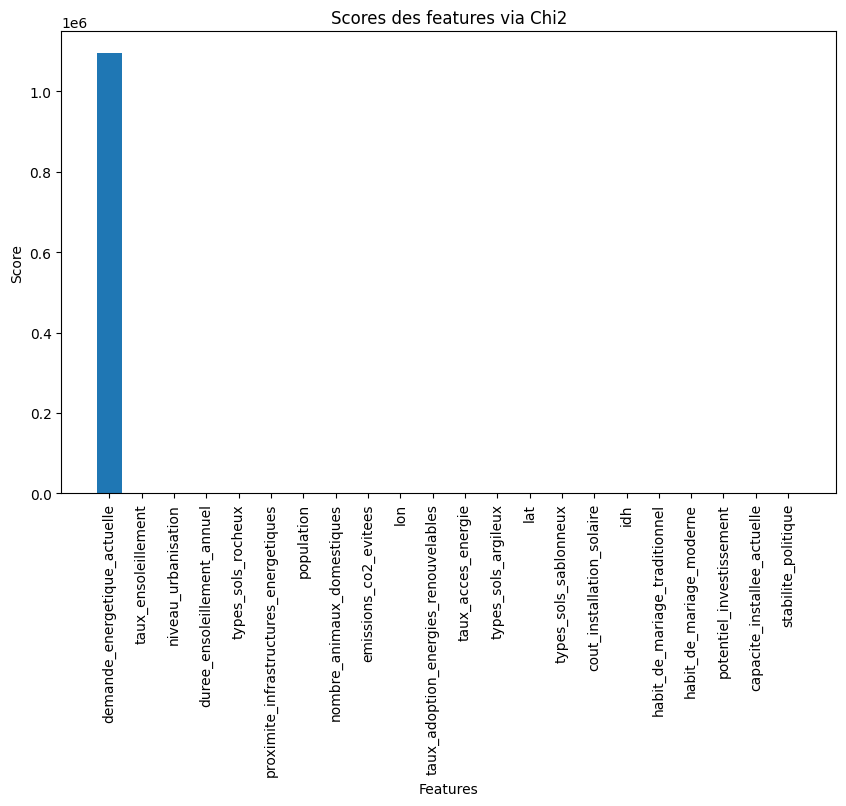

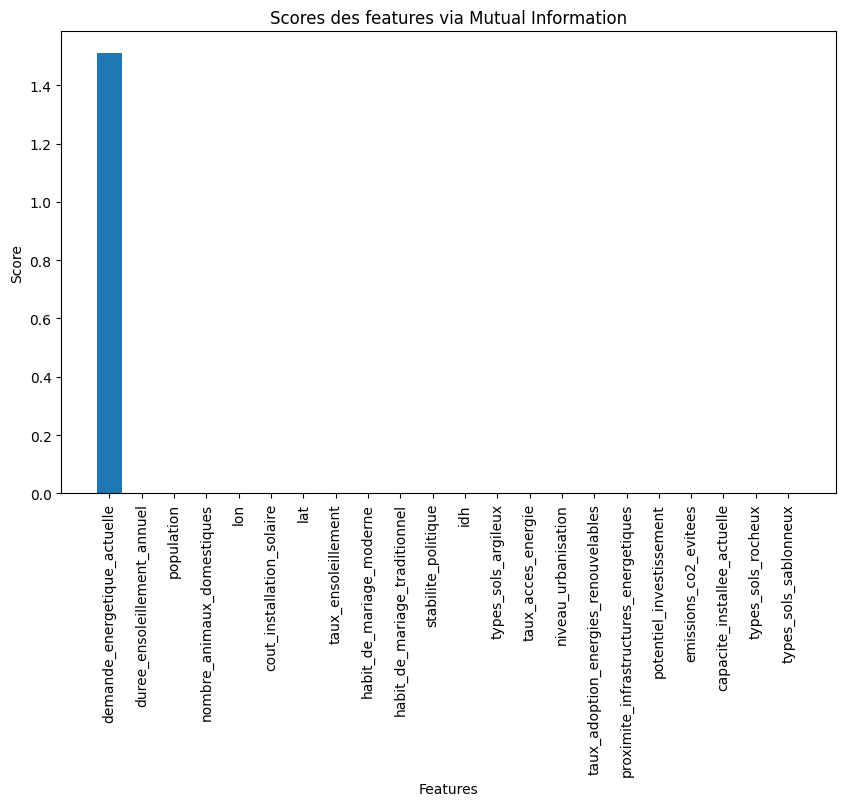

Top 10 features via Chi2: ['demande_energetique_actuelle' 'taux_ensoleillement'
 'niveau_urbanisation' 'duree_ensoleillement_annuel' 'types_sols_rocheux'
 'proximite_infrastructures_energetiques' 'population'
 'nombre_animaux_domestiques' 'emissions_co2_evitees' 'lon']
Top 10 features via Mutual Information: ['demande_energetique_actuelle' 'duree_ensoleillement_annuel' 'population'
 'nombre_animaux_domestiques' 'lon' 'cout_installation_solaire' 'lat'
 'taux_ensoleillement' 'habit_de_mariage_moderne'
 'habit_de_mariage_traditionnel']


In [98]:
# 1. Sélection de features avec le score de Chi2
chi2_selector = SelectKBest(score_func=f_regression, k=10)  # Sélectionne les 10 meilleures features
chi2_selector.fit(X_scaled, y)
chi2_scores = chi2_selector.scores_

# 2. Sélection de features avec le Mutual Information Score
mi_selector = SelectKBest(score_func=mutual_info_regression, k=10)  # Sélectionne les 10 meilleures features
mi_selector.fit(X_scaled, y)
mi_scores = mi_selector.scores_

# Affichage des résultats
def plot_feature_scores(scores, title, feature_names):
    indices = np.argsort(scores)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(scores)), scores[indices], align='center')
    plt.xticks(range(len(scores)), np.array(feature_names)[indices], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Score')
    plt.show()

# Affichage des scores pour chaque méthode
plot_feature_scores(chi2_scores, 'Scores des features via Chi2', X_scaled.columns)
plot_feature_scores(mi_scores, 'Scores des features via Mutual Information', X_scaled.columns)

# Sélection des 10 meilleures features pour chaque méthode
def select_top_k_features(scores, feature_names, k=10):
    indices = np.argsort(scores)[::-1]
    top_k_features = np.array(feature_names)[indices][:k]
    return top_k_features

top_k_chi2 = select_top_k_features(chi2_scores, X_scaled.columns, k=10)
top_k_mi = select_top_k_features(mi_scores, X_scaled.columns, k=10)

print("Top 10 features via Chi2:", top_k_chi2)
print("Top 10 features via Mutual Information:", top_k_mi)

### Approche2
####  On a qu'une seule varaible qui est imporante. c'tait previsible apres la visualisation.
Nous allons donc creer de nouvelles variables


*   Regrouper lat,lon pour avoir des zones similiaires
*  ratio capacite/demande_actuelle
*  le taux solaire:une combinaison entre taux_ensoleillment et duree_enso annuelle
*  impact social: niveau_urb et idh
* Demande non satisfaite: taux_acces et pop
* Impact environnement: emission_co2 et pop




In [7]:
cleaned_data= data.copy()

In [8]:
# Regroupement par lat,lon
coords_geo= cleaned_df[['lat','lon']]

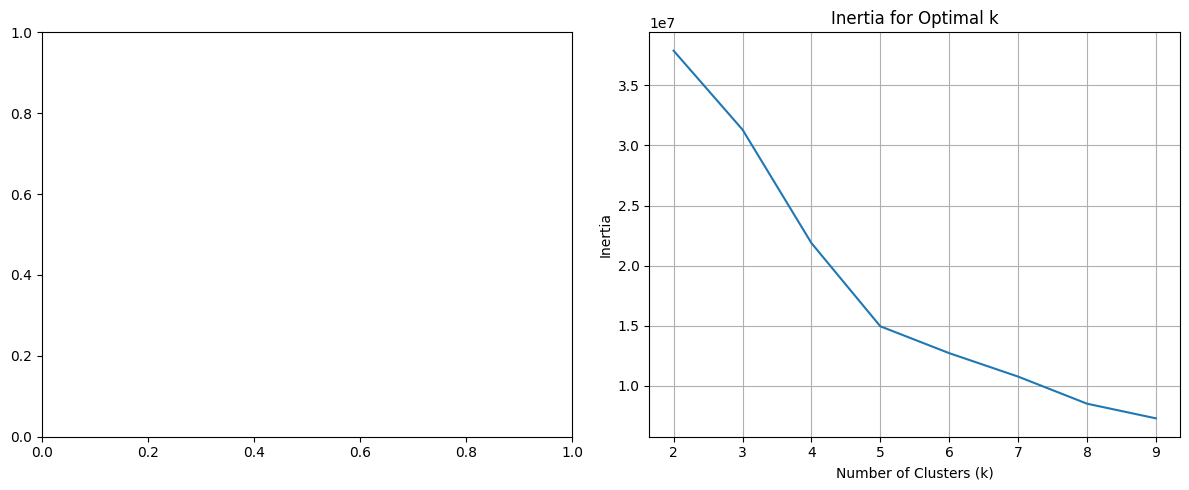

In [9]:
# On cherche le nombre de cluster optimale

# Determinons le nombre de K optimal
intertia= []
for k in range(2,10):
  model= KMeans(n_clusters=k,random_state=2024)
  model.fit(coords_geo)
  intertia.append(model.inertia_)

# silhouette_scores = []
# for k in range(2, 10):  # Test k from 2 to 9
#     kmeans = KMeans(n_clusters=k, random_state=42)  # Set random_state for reproducibility
#     cluster_labels = kmeans.fit_predict(coords_geo)
#     silhouette_avg = silhouette_score(coords_geo, cluster_labels)
#     silhouette_scores.append(silhouette_avg)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot silhouette scores
# axes[0].plot(range(2, 10), silhouette_scores)
# axes[0].set_xlabel('Number of Clusters (k)')
# axes[0].set_ylabel('Silhouette Score')
# axes[0].set_title('Silhouette Score for Optimal k')
# axes[0].grid(True)

# Plot inertia
axes[1].plot(range(2, 10), intertia)
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Inertia')
axes[1].set_title('Inertia for Optimal k')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [13]:
model= KMeans(n_clusters=5,random_state=2024)
cleaned_df['cluster_geo']= model.fit_predict(coords_geo)

In [14]:
cleaned_df['cluster_geo'].value_counts(normalize=True)

cluster_geo
1    0.264760
0    0.227513
4    0.225733
3    0.187327
2    0.094667
Name: proportion, dtype: float64

<Axes: ylabel='count'>

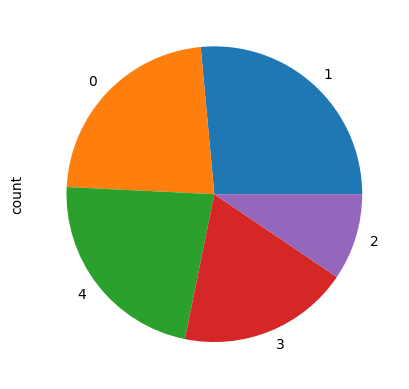

In [15]:
cleaned_df['cluster_geo'].value_counts().plot(kind='pie')

In [17]:
# # Affichage en 3D
# fig = plt.figure(figsize=(8, 10))
# ax = fig.add_subplot(111, projection='3d')
# x= cleaned_df['population']
# z= cleaned_df['demande_energetique_projectee']
# y= cleaned_df['demande_energetique_actuelle']
# ax.scatter(x, y, z, c=cleaned_df['cluster_geo'], cmap='viridis')
# ax.set_xlabel('demande_energetique_actuelle')
# ax.set_ylabel('demande_energetique_projectee')
# ax.set_zlabel('population')
# plt.show()


In [18]:
# Creer la variable ratio capacite/demande
cleaned_df['ratio_capacite_demande']= cleaned_df['capacite_installee_actuelle']/cleaned_df['demande_energetique_actuelle']

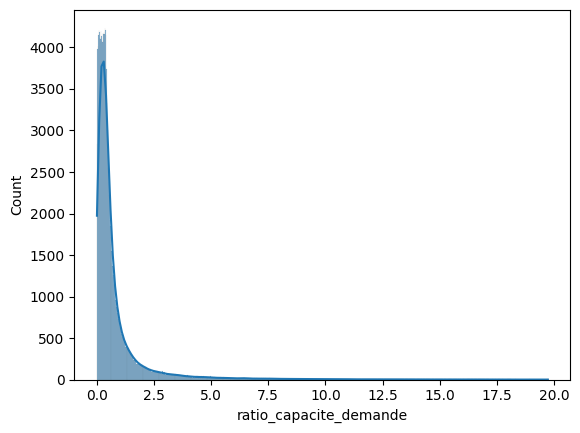

In [14]:
sns.histplot(cleaned_df['ratio_capacite_demande'],kde=True);

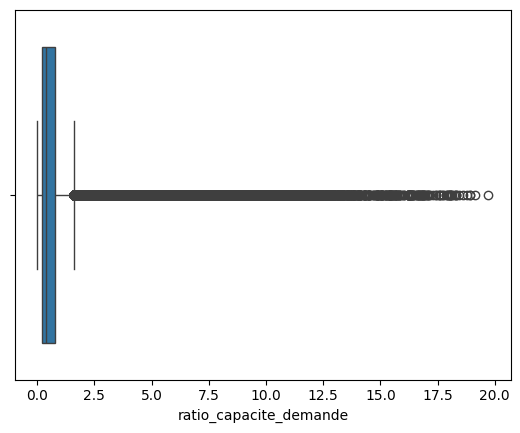

In [19]:
# Affiche en boxplot
sns.boxplot(x=cleaned_df['ratio_capacite_demande']);

In [20]:
# Creer la variable le taux_solaire
cleaned_df['taux_solaire']= cleaned_df['duree_ensoleillement_annuel']*cleaned_df['taux_ensoleillement']

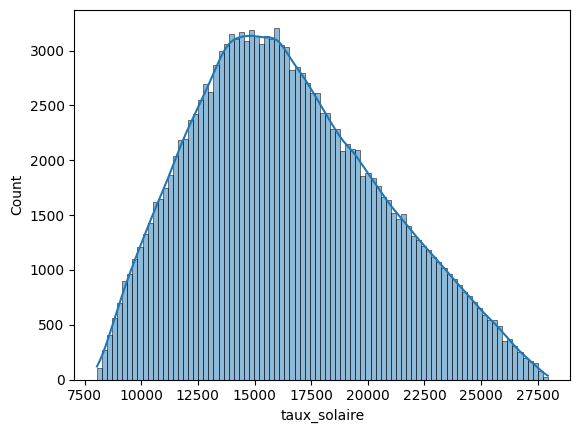

In [17]:
sns.histplot(cleaned_df['taux_solaire'],kde=True);


In [21]:
# Creer la variable demande_potentielle_non_satisfaite
cleaned_df['demande_potentielle_non_satisfaite']= cleaned_df['taux_acces_energie']*cleaned_df['population']

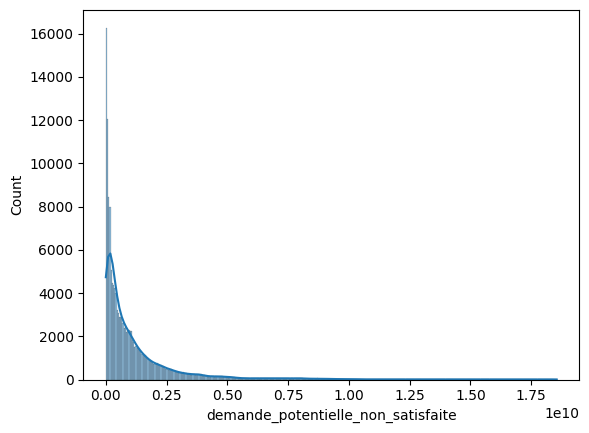

In [19]:
sns.histplot(cleaned_df['demande_potentielle_non_satisfaite'],kde=True);

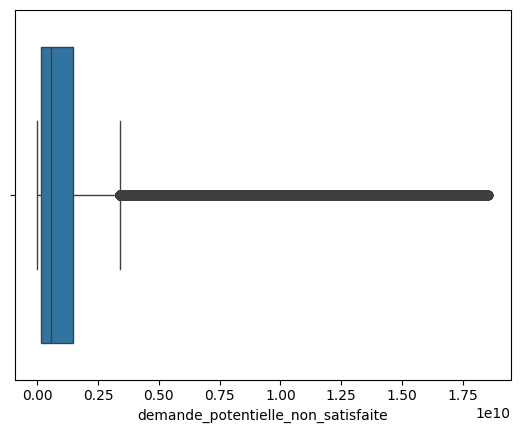

In [23]:
# Afiiche le avec un boxplot pour voir les outliers
sns.boxplot(x=cleaned_df['demande_potentielle_non_satisfaite']);

In [24]:
# Creer une variable impact_deve_humain
cleaned_df['impact_deve_humain']= cleaned_df['niveau_urbanisation']*cleaned_df['idh']

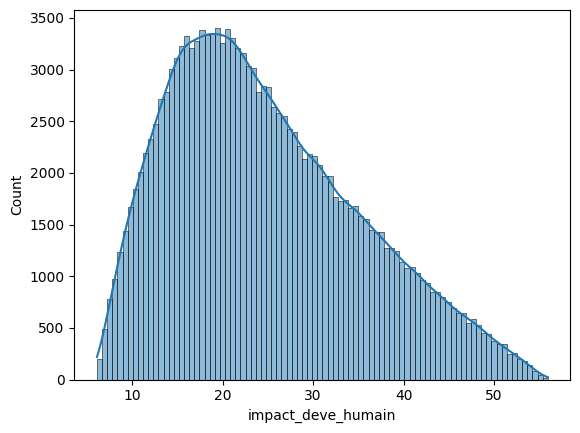

In [22]:
sns.histplot(cleaned_df['impact_deve_humain'],kde=True);


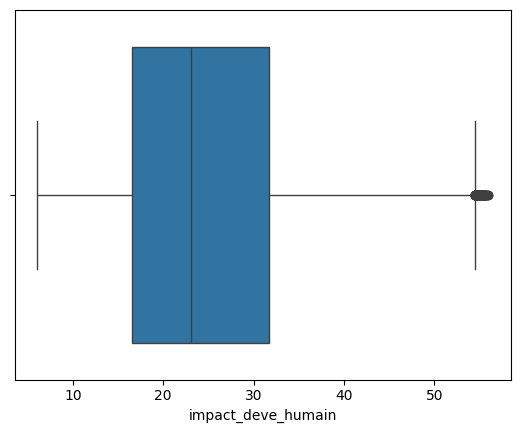

In [37]:
sns.boxplot(x=cleaned_df['impact_deve_humain']);

In [25]:
# Creer une variable impact_envi_par_hbt
cleaned_df['impact_envi_par_hbt']= cleaned_df['emissions_co2_evitees']*cleaned_df['population']

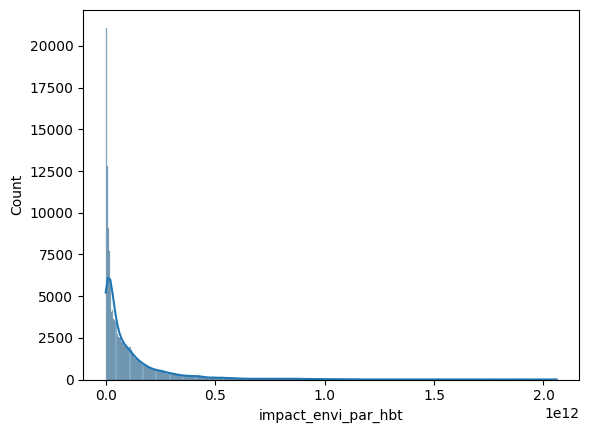

In [24]:
sns.histplot(cleaned_df['impact_envi_par_hbt'],kde=True);

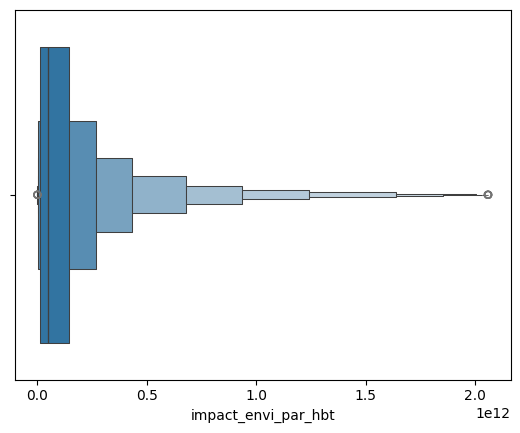

In [25]:
sns.boxenplot(x=cleaned_df['impact_envi_par_hbt']);

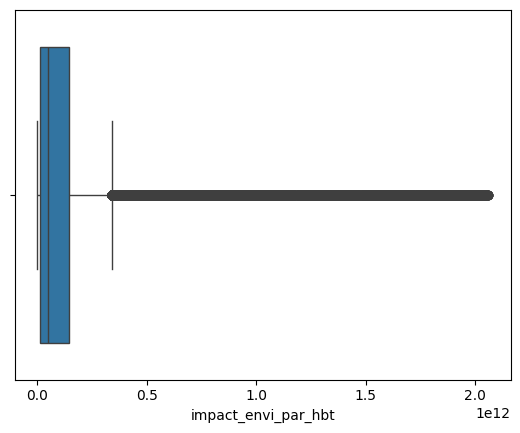

In [41]:
sns.boxplot(x=cleaned_df['impact_envi_par_hbt']);

In [44]:
# # Une fonction pour voir la distribution des nouvelles variables en fonction de la variables cibles
# def plot_distributions(df, target_variable, new_variables):
#   """
#   Plots the distributions of new variables against the target variable.

#   Args:
#       df: The DataFrame containing the data.
#       target_variable: The name of the target variable column.
#       new_variables: A list of the names of the new variable columns.
#   """
#   for variable in new_variables:
#     plt.figure(figsize=(10, 6))
#     if df[variable].dtype in ['int64', 'float64']:  # Check for numeric data
#       sns.histplot(x=variable, hue=target_variable, data=df, kde=True)
#       plt.title(f'Distribution of {variable} by {target_variable}')
#     else:  # For non-numeric variables (e.g., categorical), use countplot
#       sns.countplot(x=variable, hue=target_variable, data=df)
#       plt.title(f'Countplot of {variable} by {target_variable}')

#     plt.show()


# # Example usage (replace with your actual data and variables):
# # Assuming 'cleaned_df' is your DataFrame, 'demande_energetique_projectee' is the target
# # and 'ratio_capacite_demande', 'taux_solaire' are the new features.
# new_features = ['ratio_capacite_demande', 'taux_solaire', 'demande_potentielle_non_satisfaite', 'impact_deve_humain', 'impact_envi_par_hbt']

# plot_distributions(cleaned_df, 'demande_energetique_projectee', new_features)


In [46]:
# # Affiche la distribution de la variable en fonction de la ratio_capacite_demande
# plt.figure(figsize=(10, 6))
# sns.histplot(x='ratio_capacite_demande', hue='demande_energetique_projectee', data=cleaned_df, kde=True)

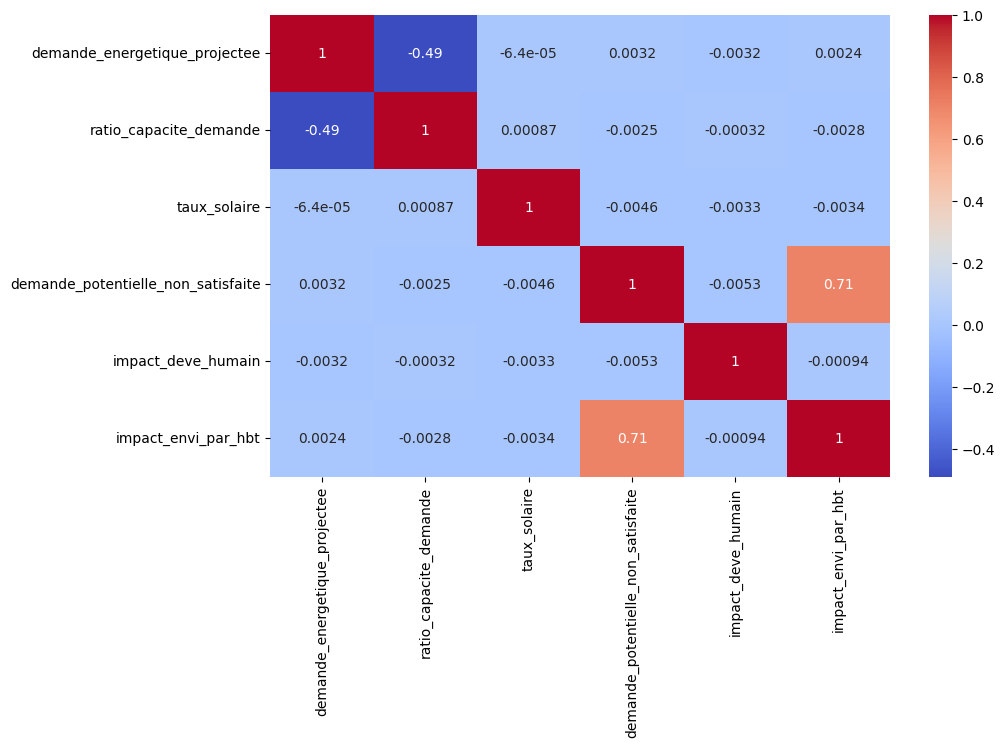

In [26]:
# Affiche le heatmap des colonnes creer
cols= ['demande_energetique_projectee','ratio_capacite_demande', 'taux_solaire', 'demande_potentielle_non_satisfaite', 'impact_deve_humain', 'impact_envi_par_hbt']
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_df[cols] .corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='cluster_geo', ylabel='count'>

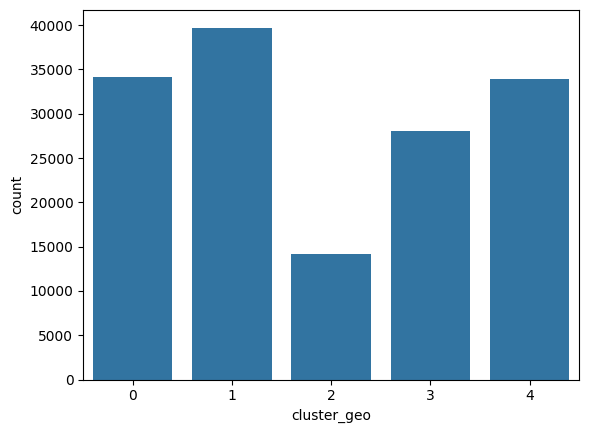

In [27]:
# Afficher la variable cluster_geo
sns.countplot(x=cleaned_df['cluster_geo'])

In [30]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   country                                 150000 non-null  object 
 1   lat                                     150000 non-null  float64
 2   lon                                     150000 non-null  float64
 3   population                              150000 non-null  int64  
 4   taux_ensoleillement                     150000 non-null  float64
 5   demande_energetique_actuelle            150000 non-null  float64
 6   demande_energetique_projectee           150000 non-null  float64
 7   capacite_installee_actuelle             150000 non-null  float64
 8   duree_ensoleillement_annuel             150000 non-null  float64
 9   cout_installation_solaire               150000 non-null  float64
 10  proximite_infrastructures_energetiques  1500

In [33]:
# Chercons une fois de plus les variables interessantes
X= cleaned_df.drop(['demande_energetique_projectee','country','types_sols','habit_de_mariage'], axis=1)
y= cleaned_df['demande_energetique_projectee']


In [34]:
# Normalisation des données (obligatoire pour Chi2)
scaler = MinMaxScaler()  # Chi2 nécessite des valeurs positives
X_scaled = scaler.fit_transform(X)

In [35]:
# Convertir X en DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [37]:
# type(X_scaled)

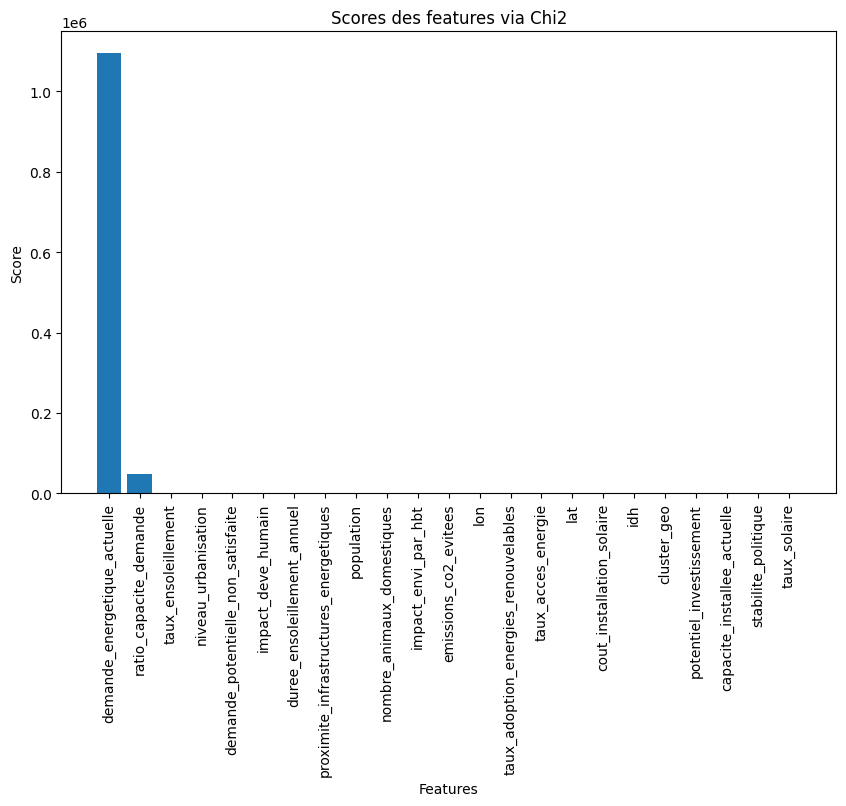

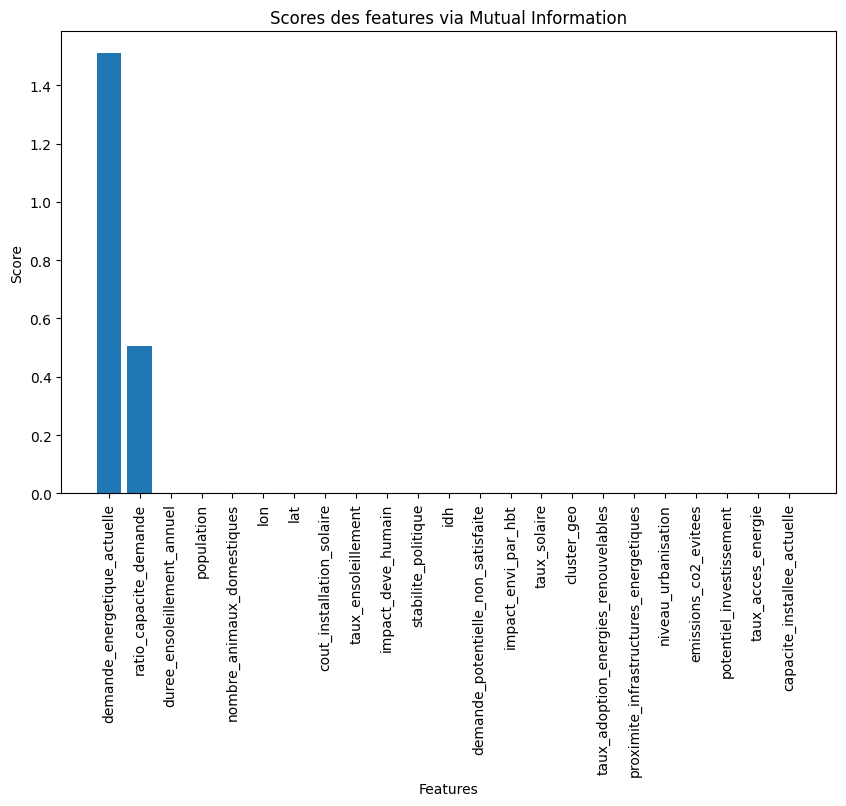

Top 10 features via Chi2: ['demande_energetique_actuelle' 'ratio_capacite_demande'
 'taux_ensoleillement' 'niveau_urbanisation'
 'demande_potentielle_non_satisfaite' 'impact_deve_humain'
 'duree_ensoleillement_annuel' 'proximite_infrastructures_energetiques'
 'population' 'nombre_animaux_domestiques']
Top 10 features via Mutual Information: ['demande_energetique_actuelle' 'ratio_capacite_demande'
 'duree_ensoleillement_annuel' 'population' 'nombre_animaux_domestiques'
 'lon' 'lat' 'cout_installation_solaire' 'taux_ensoleillement'
 'impact_deve_humain']


In [38]:
# 1. Sélection de features avec le score de Chi2
chi2_selector = SelectKBest(score_func=f_regression, k=10)  # Sélectionne les 10 meilleures features
chi2_selector.fit(X_scaled, y)
chi2_scores = chi2_selector.scores_

# 2. Sélection de features avec le Mutual Information Score
mi_selector = SelectKBest(score_func=mutual_info_regression, k=10)  # Sélectionne les 10 meilleures features
mi_selector.fit(X_scaled, y)
mi_scores = mi_selector.scores_

# Affichage des résultats
def plot_feature_scores(scores, title, feature_names):
    indices = np.argsort(scores)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(scores)), scores[indices], align='center')
    plt.xticks(range(len(scores)), np.array(feature_names)[indices], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Score')
    plt.show()

# Affichage des scores pour chaque méthode
plot_feature_scores(chi2_scores, 'Scores des features via Chi2', X_scaled.columns)
plot_feature_scores(mi_scores, 'Scores des features via Mutual Information', X_scaled.columns)

# Sélection des 10 meilleures features pour chaque méthode
def select_top_k_features(scores, feature_names, k=10):
    indices = np.argsort(scores)[::-1]
    top_k_features = np.array(feature_names)[indices][:k]
    return top_k_features

top_k_chi2 = select_top_k_features(chi2_scores, X_scaled.columns, k=10)
top_k_mi = select_top_k_features(mi_scores, X_scaled.columns, k=10)

print("Top 10 features via Chi2:", top_k_chi2)
print("Top 10 features via Mutual Information:", top_k_mi)

In [43]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   country                                 150000 non-null  object 
 1   lat                                     150000 non-null  float64
 2   lon                                     150000 non-null  float64
 3   population                              150000 non-null  int64  
 4   taux_ensoleillement                     150000 non-null  float64
 5   demande_energetique_actuelle            150000 non-null  float64
 6   demande_energetique_projectee           150000 non-null  float64
 7   capacite_installee_actuelle             150000 non-null  float64
 8   duree_ensoleillement_annuel             150000 non-null  float64
 9   cout_installation_solaire               150000 non-null  float64
 10  proximite_infrastructures_energetiques  1500

In [44]:
cols = ['ratio_capacite_demande','demande_energetique_projectee','demande_energetique_actuelle', 'taux_solaire', 'demande_potentielle_non_satisfaite', 'impact_deve_humain', 'impact_envi_par_hbt']
cleaned_df= cleaned_df[cols]

In [45]:
cleaned_df.to_csv('cleaned_data_v2.csv', index=False)

In [46]:
cleaned_df

ratio_capacite_demande  demande_energetique_projectee  \
0                     1.202115                     544.232257   
1                     0.115201                    1864.048290   
2                     0.298113                    5525.433108   
3                     1.713952                    1447.543617   
4                     0.380858                    3029.604497   
...                        ...                            ...   
149995                0.013836                    6792.508308   
149996                0.647004                    3066.314014   
149997                0.222500                    7627.683605   
149998                0.637592                    3443.013844   
149999                1.668968                    1802.946084   

        demande_energetique_actuelle  taux_solaire  \
0                         485.085906  19704.067660   
1                        1422.802172  17304.682602   
2                        4711.082367  22040.855970   
3                         799.426659   8402.204211   
4                        2526.920477  20881.553043   
...                              ...           ...   
149995                   4228.901134  22517.528361   
149996                   2818.217897  15103.508681   
149997                   4171.707472  17108.373377   
149998                   2108.877945  26490.883146   
149999                    923.293136  16582.958062   

        demande_potentielle_non_satisfaite  impact_deve_humain  \
0                             1.003263e+09           15.786770   
1                             3.412996e+08           15.256743   
2                             4.417333e+07           31.858964   
3                             3.455883e+08           29.399502   
4                             4.270228e+09           22.569892   
...                                    ...                 ...   
149995                        1.153233e+08           12.184331   
149996                        2.698923e+09           34.426604   
149997                        1.372868e+09           22.835726   
149998                        7.314429e+08           21.953611   
149999                        7.571419e+08           11.111034   

        impact_envi_par_hbt  
0              8.252041e+09  
1              2.054005e+10  
2              2.496292e+10  
3              1.495104e+11  
4              8.225458e+11  
...                     ...  
149995         2.587330e+10  
149996         1.593204e+11  
149997         3.041056e+10  
149998         1.280452e+11  
149999         1.009122e+11  

[150000 rows x 7 columns]

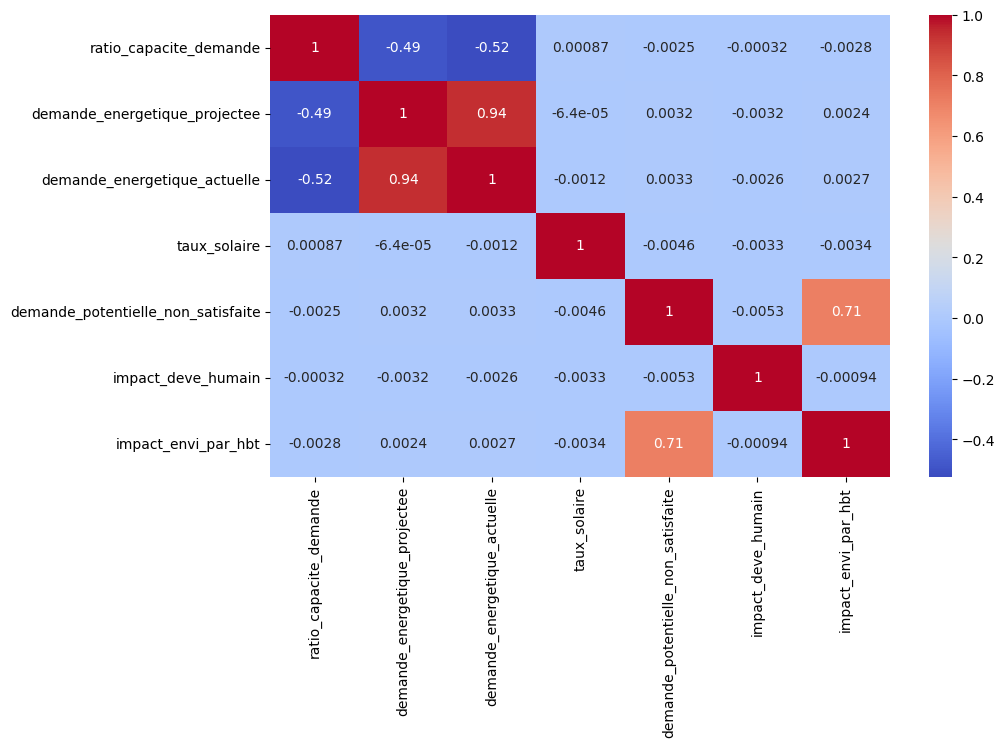

In [47]:
#Affiche le heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_df.corr(), annot=True, cmap='coolwarm')
plt.show()

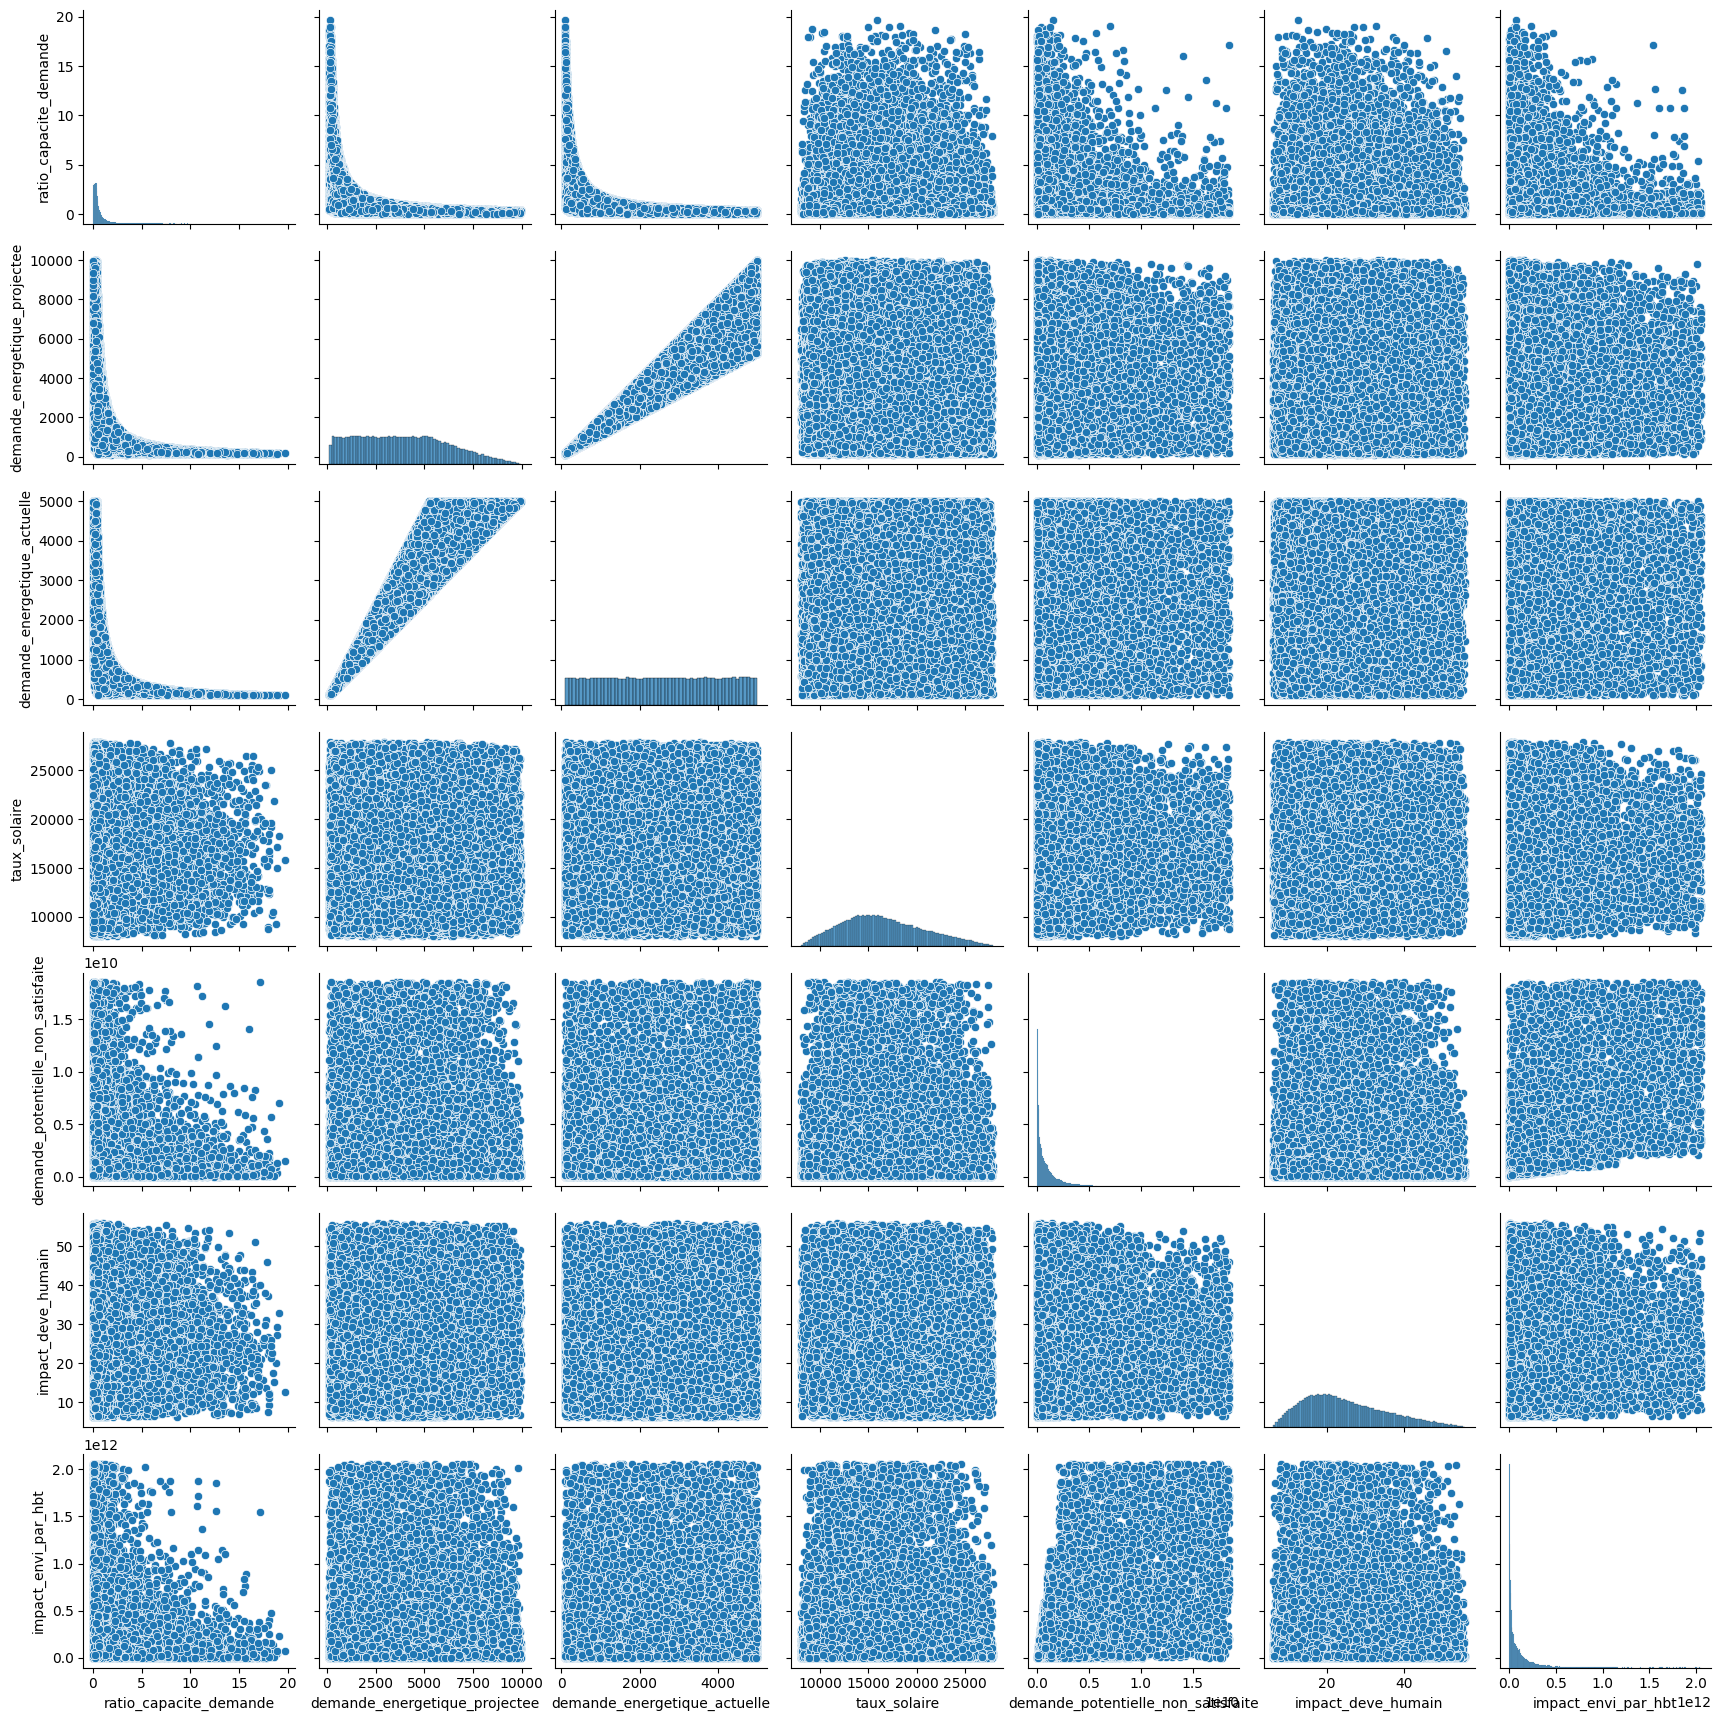

In [48]:
# Affiche le pairplot
sns.pairplot(cleaned_df)
plt.show()

In [11]:
data= pd.read_csv('/content/drive/MyDrive/projetIA/Projet2/cleaned_data_v2.csv')
data

ratio_capacite_demande  demande_energetique_projectee  \
0                     1.202115                     544.232257   
1                     0.115201                    1864.048290   
2                     0.298113                    5525.433108   
3                     1.713952                    1447.543617   
4                     0.380858                    3029.604497   
...                        ...                            ...   
149995                0.013836                    6792.508308   
149996                0.647004                    3066.314014   
149997                0.222500                    7627.683605   
149998                0.637592                    3443.013844   
149999                1.668968                    1802.946084   

        demande_energetique_actuelle  taux_solaire  \
0                         485.085906  19704.067660   
1                        1422.802172  17304.682602   
2                        4711.082367  22040.855970   
3                         799.426659   8402.204211   
4                        2526.920477  20881.553043   
...                              ...           ...   
149995                   4228.901134  22517.528361   
149996                   2818.217897  15103.508681   
149997                   4171.707472  17108.373377   
149998                   2108.877945  26490.883146   
149999                    923.293136  16582.958062   

        demande_potentielle_non_satisfaite  impact_deve_humain  \
0                             1.003263e+09           15.786770   
1                             3.412996e+08           15.256743   
2                             4.417333e+07           31.858964   
3                             3.455883e+08           29.399502   
4                             4.270228e+09           22.569892   
...                                    ...                 ...   
149995                        1.153233e+08           12.184331   
149996                        2.698923e+09           34.426604   
149997                        1.372868e+09           22.835726   
149998                        7.314429e+08           21.953611   
149999                        7.571419e+08           11.111034   

        impact_envi_par_hbt  
0              8.252041e+09  
1              2.054005e+10  
2              2.496292e+10  
3              1.495104e+11  
4              8.225458e+11  
...                     ...  
149995         2.587330e+10  
149996         1.593204e+11  
149997         3.041056e+10  
149998         1.280452e+11  
149999         1.009122e+11  

[150000 rows x 7 columns]

In [12]:
# Diviser les donnees en X et Y
X= data.drop(['demande_energetique_projectee'], axis=1)
y= data['demande_energetique_projectee']

In [18]:
# Splitter les donnees en test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [19]:
(X_train.shape, y_train.shape)

((120000, 6), (120000,))

In [20]:
# Entrainer trois models de regression
models={
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
}
for name, model in models.items():
  model.fit(X_train,y_train)
  print(f'{name} is Trained...')




LinearRegression is Trained...
DecisionTreeRegressor is Trained...
RandomForestRegressor is Trained...


In [22]:
# Evaluation evec rmse, mse mae
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae= mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse}, R2: {r2}, MAE:{mae}, MSE:{mse}")




LinearRegression - MSE: 638949.1167932353, R2: 0.8794941388486157, MAE:604.381698607195, MSE:638949.1167932353
DecisionTreeRegressor - MSE: 1266797.4164607783, R2: 0.7610818928100113, MAE:802.405078224464, MSE:1266797.4164607783
RandomForestRegressor - MSE: 665825.0192401019, R2: 0.8744253412191039, MAE:613.472041133213, MSE:665825.0192401019
